In [72]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font', size='15')
plt.rcParams['svg.fonttype'] = 'none'

## Загрузка данных

In [44]:
CDR_seq = pd.read_csv('CDR_seq_df.csv').set_index('pdb')
esm_embeddings = pd.read_csv('СDR_seq_esm_df.csv').set_index('name')

In [45]:
final_df = CDR_seq.melt(ignore_index=False).reset_index()

In [46]:
final_df['name'] = final_df["variable"] + '_' + final_df["pdb"]
final_df = final_df.join(esm_embeddings, on='name')

In [47]:
del final_df['name']
del final_df['value']

In [48]:
final_df = final_df.set_index('pdb')

In [49]:
final_df

,variable,0,1,2,3,4,5,6,7,8,...,310,311,312,313,314,315,316,317,318,319
pdb,,,,,,,,,,,,,,,,,,,,,
7sue,L1,0.169048,-0.129814,0.203207,0.113184,0.182868,-0.157815,-0.125390,-0.115409,-0.055825,...,-0.098781,-0.111098,0.084321,-0.031081,0.005707,-0.045368,-0.056132,0.088700,0.249774,-0.141168
5js9,L1,0.214014,-0.244750,0.157262,0.087272,0.051674,-0.143681,-0.213799,-0.044551,-0.095003,...,-0.018682,-0.055244,0.224742,0.009668,-0.027189,0.019620,0.005634,0.127834,0.221463,-0.073884
6lfm,L1,0.040898,-0.077511,-0.059405,-0.038275,0.195314,-0.028333,-0.038897,-0.131628,-0.229420,...,0.051513,-0.076444,0.149857,0.120014,-0.170224,-0.032087,0.018236,0.222332,0.288073,-0.027764
6lfo,L1,0.040898,-0.077511,-0.059405,-0.038275,0.195314,-0.028333,-0.038897,-0.131628,-0.229420,...,0.051513,-0.076444,0.149857,0.120014,-0.170224,-0.032087,0.018236,0.222332,0.288073,-0.027764
7su1,L1,0.148770,-0.290609,0.360458,0.091045,-0.018062,-0.078737,-0.133059,-0.007988,-0.272696,...,0.027113,0.061475,0.189612,0.000992,-0.091628,0.094796,0.003117,0.064236,0.187472,-0.059418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5ock,H3,0.106362,-0.371591,0.277427,0.083977,0.111664,-0.200900,-0.132621,-0.022689,-0.071048,...,0.007078,-0.161080,0.096759,-0.040534,0.025852,0.076246,0.003620,0.044291,0.211866,-0.038125
4d9q,H3,0.153131,-0.283752,0.615698,0.127721,-0.144401,-0.269430,-0.094096,-0.060198,-0.006404,...,0.118054,-0.042937,0.008815,-0.093900,0.058767,0.082683,-0.195370,0.085599,0.257525,-0.073179
6vtt,H3,0.091309,-0.265620,0.257859,0.135885,0.016462,-0.074219,-0.168986,-0.015153,-0.139011,...,0.007138,-0.075620,0.030137,-0.007887,-0.037477,0.047601,-0.186482,-0.070243,0.193884,-0.064556


In [50]:
final_df = pd.pivot(final_df, columns='variable')
final_df.columns =[str(s2)+ '_' + str(s1) for (s1,s2) in final_df.columns.tolist()]
final_df.columns = sorted(final_df.columns)

final_df = final_df.dropna() # те самые 11 с отсутсвием какого-то CDR

In [51]:
final_df

,H1_0,H1_1,H1_10,H1_100,H1_101,H1_102,H1_103,H1_104,H1_105,H1_106,...,L3_90,L3_91,L3_92,L3_93,L3_94,L3_95,L3_96,L3_97,L3_98,L3_99
pdb,,,,,,,,,,,,,,,,,,,,,
1adq,0.098829,0.144788,0.030637,0.151016,0.030303,0.061697,-0.147869,-0.260552,-0.178028,-0.338649,...,0.348926,0.193052,0.218195,0.258028,-0.149202,-0.101706,-0.089149,-0.025002,-0.263596,-0.103321
1axs,0.015886,0.104799,-0.198686,0.073653,0.147005,0.111329,-0.304286,-0.395720,0.196225,-0.228312,...,0.101686,0.137818,0.205298,0.254965,-0.018078,-0.025009,-0.334175,-0.027440,-0.022885,-0.036863
1bvk,0.107134,-0.011996,0.017404,0.116284,0.154188,0.039077,-0.275399,-0.280301,-0.254522,-0.325614,...,0.279536,0.116959,0.306499,0.255020,-0.074307,-0.260093,-0.182321,-0.120163,-0.114625,0.000186
1cly,0.099034,0.176063,0.106009,0.142003,0.097303,0.070222,-0.240664,-0.348915,-0.118064,-0.234700,...,0.235777,0.159299,0.208348,0.271838,-0.057474,-0.111843,-0.216067,-0.059452,0.085843,0.034592
1dee,0.089225,0.117118,0.068046,0.088896,0.111072,0.071730,-0.276448,-0.207719,-0.156970,-0.334844,...,0.207040,0.233775,0.193098,0.253023,-0.088843,-0.098245,-0.062265,0.029974,-0.023848,-0.042903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8sb1,0.130272,0.137972,0.090150,0.171670,0.046615,0.013131,-0.154030,-0.448611,0.033477,-0.109901,...,0.087568,0.215885,0.156901,0.379929,-0.158480,-0.090562,-0.200924,-0.128689,0.087957,0.012851
8sb2,0.115035,0.074228,0.008628,0.133936,0.046615,0.056500,-0.166113,-0.383291,-0.066556,-0.122901,...,0.171207,0.260507,0.156901,0.442246,-0.128915,-0.024557,-0.151642,-0.130407,0.087957,0.019440
8sb3,0.130272,0.138699,0.117981,0.171670,0.123855,0.033491,-0.154030,-0.418333,-0.100097,-0.109901,...,0.197528,0.215885,0.244715,0.359790,-0.158480,-0.084058,-0.153519,-0.128689,0.041303,0.019333


In [52]:
X = final_df.values

## Уменьшение размерности

In [53]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [55]:
clust_df = pd.DataFrame({"pdb": final_df.index,
                        "pca 1": X_pca[:,0],
                        "pca 2": X_pca[:,1]})

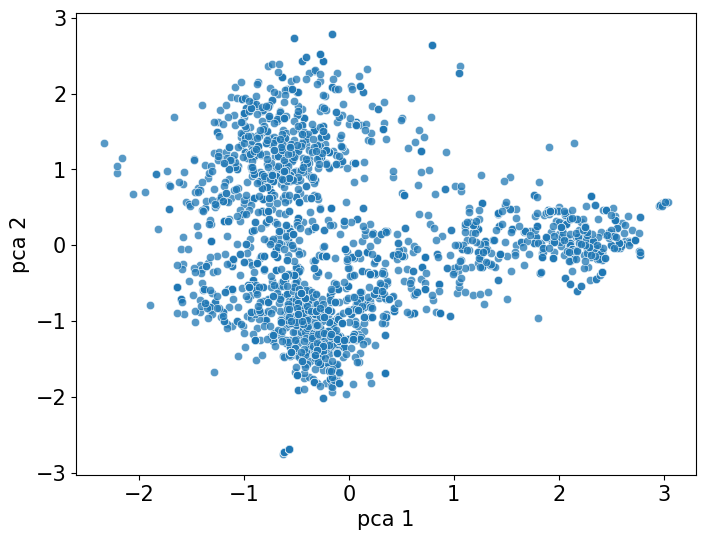

In [73]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="pca 1", y="pca 2", data=clust_df, alpha=0.75)
plt.show()

## Agglomerative clustering

In [57]:
from sklearn.cluster import AgglomerativeClustering

In [58]:
ag = AgglomerativeClustering(n_clusters=4, compute_full_tree=True, compute_distances=True)
# n_clusters выбрано после взгляда на полное древо

In [59]:
ag.fit(X)

AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        n_clusters=4)

In [61]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

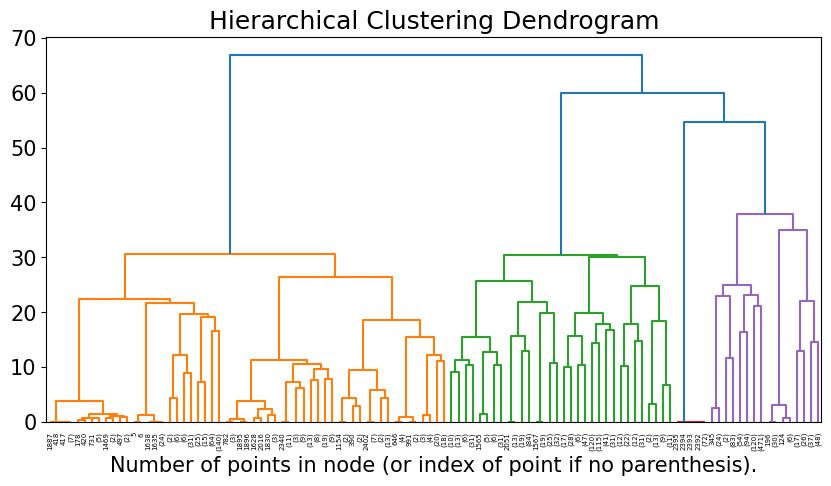

In [74]:
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(ag, truncate_mode='level', p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

# plt.savefig('ag_tree_small.svg')

Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

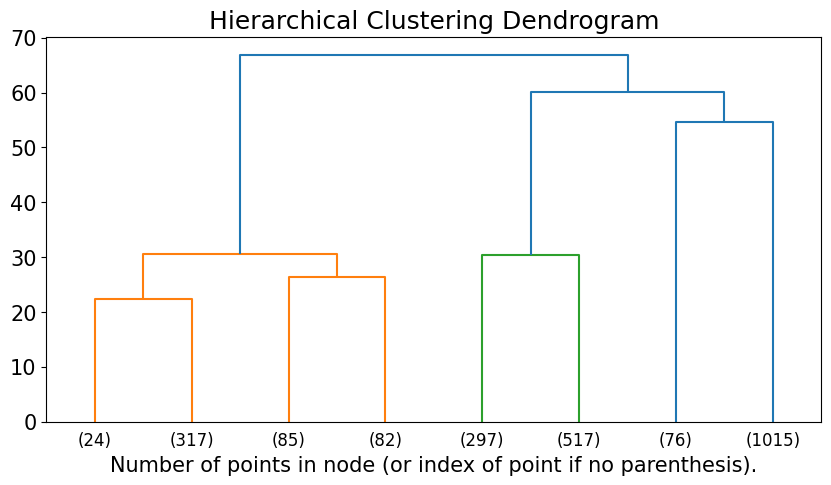

In [75]:
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(ag, truncate_mode='level', p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

# plt.savefig('ag_tree_small.svg')

In [66]:
clust_df['ag'] =  ag.labels_

In [68]:
clust_df['ag'].value_counts()

0    1015
2     814
1     508
3      76
Name: ag, dtype: int64

In [69]:
from sklearn.metrics import silhouette_score
silhouette_score(X, clust_df['ag'])

0.10939198796505148

In [70]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X, clust_df['ag'])

165.16752644958623

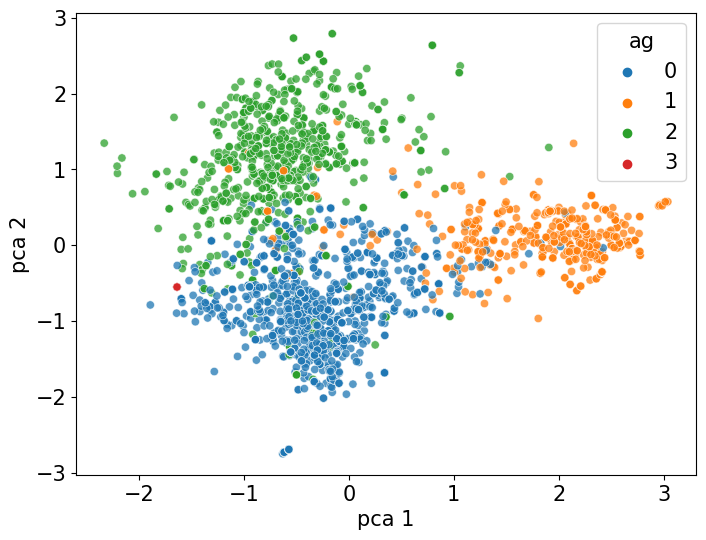

In [76]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="pca 1", y="pca 2", hue='ag', data=clust_df, alpha=0.75, palette='tab10')

plt.savefig('ag_clust_pca_viz.svg')

## Анализ

### Чтение метаданных

In [78]:
metainf = pd.read_csv('structures_summary.tsv', sep='\t',
                     na_values={'resolution': ['NOT', 'NA', 'None', '0'],
                                'r_free': ['NOT', 'NA', 'None', 'unknown'],
                                'affinity': ['NOT', 'NA', 'None'],
                                'delta_g': ['NOT', 'NA', 'None'],
                                'affinity_method': ['NOT', 'NA', 'None'],
                                'temperature': ['NOT', 'NA', 'None'],
                                'pmid': ['NOT', 'NA', 'None'],
                               },                      
                     )

In [79]:
metainf.columns

Index(['pdb', 'Hchain', 'Lchain', 'model', 'antigen_chain', 'antigen_type',
       'antigen_het_name', 'antigen_name', 'short_header', 'date', 'compound',
       'organism', 'heavy_species', 'light_species', 'antigen_species',
       'authors', 'resolution', 'method', 'r_free', 'r_factor', 'scfv',
       'engineered', 'heavy_subclass', 'light_subclass', 'light_ctype',
       'affinity', 'delta_g', 'affinity_method', 'temperature', 'pmid'],
      dtype='object')

In [80]:
# вариант, где антигены списком

metainf['resolution'] = metainf['resolution'].str.extract('([^,]+)').astype(float)
metainf['date'] = pd.to_datetime(metainf['date'].astype(str), 
                                 format="%m/%d/%y", 
                                 errors='coerce')
metainf.dropna(subset=['Hchain', 'Lchain'], inplace=True)

In [81]:
metainf = metainf.merge(clust_df, on='pdb')

In [87]:
metainf

,pdb,Hchain,Lchain,model,antigen_chain,antigen_type,antigen_het_name,antigen_name,short_header,date,...,light_subclass,light_ctype,affinity,delta_g,affinity_method,temperature,pmid,pca 1,pca 2,ag
0,7sue,F,E,0,J,protein,NaN,nucleoprotein,VIRAL PROTEIN,2022-08-10,...,IGLV2,Lambda,NaN,NaN,NaN,NaN,NaN,-0.532317,0.854491,2
1,7sue,I,G,0,K,protein,NaN,nucleoprotein,VIRAL PROTEIN,2022-08-10,...,IGLV2,Lambda,NaN,NaN,NaN,NaN,NaN,-0.532317,0.854491,2
2,7sue,B,A,0,D,protein,NaN,nucleoprotein,VIRAL PROTEIN,2022-08-10,...,IGLV2,Lambda,NaN,NaN,NaN,NaN,NaN,-0.532317,0.854491,2
3,7sue,H,L,0,C,protein,NaN,nucleoprotein,VIRAL PROTEIN,2022-08-10,...,IGLV2,Lambda,NaN,NaN,NaN,NaN,NaN,-0.532317,0.854491,2
4,5js9,E,F,0,C | D,protein | protein,NA | NA,gp120 | gp41,VIRAL PROTEIN/IMMUNE SYSTEM,2016-07-13,...,IGKV1,Kappa,NaN,NaN,NaN,NaN,NaN,-0.539720,-0.374437,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,4d9q,H,L,0,A,protein,NaN,factor d,HYDROLASE/IMMUNE SYSTEM,2012-01-11,...,IGKV1,Kappa,3.000000e-11,-14.355775,SPR,NaN,TBD,-0.317791,0.865846,0
5021,6vtt,H,L,0,G | F | E,protein | protein | protein,NA | NA | NA,envelope glycoprotein gp120 | envelope glycopr...,VIRAL PROTEIN/IMMUNE SYSTEM,2020-04-08,...,IGLV1,Lambda,NaN,NaN,NaN,NaN,NaN,-0.443706,1.584297,2
5022,6vtu,H,L,0,A,carbohydrate,MAN,ALPHA-D-MANNOSE,IMMUNE SYSTEM,2020-02-13,...,IGLV2,Lambda,NaN,NaN,NaN,NaN,NaN,0.669258,1.524464,2
5023,6azm,B,A,0,E,peptide,NaN,circumsporozoite protein nanp 5-mer,IMMUNE SYSTEM,2017-09-11,...,IGKV4,Kappa,NaN,NaN,NaN,NaN,NaN,0.966056,-0.127916,1


In [106]:
# вариант, где антигены по одному в строчке

metainf_exploded = metainf.copy()

for col in ['antigen_chain', 'antigen_type', 'antigen_het_name', 'antigen_name']:
    metainf_exploded[col] = metainf_exploded[col].str.split(pat=' | ', regex=False)
    metainf_exploded = metainf_exploded.explode(col)
    metainf_exploded['antigen_count'] = metainf_exploded['antigen_chain'].apply(lambda x: len(x) if isinstance(x, list) else None)

metainf_exploded = metainf_exploded.drop_duplicates()

In [107]:
metainf_exploded['short_header'] = metainf_exploded['short_header'].str.replace(',','/')

metainf_exploded['short_header'] = metainf_exploded['short_header'].str.split(pat='/', regex=False)
metainf_exploded = metainf_exploded.explode('short_header')
metainf_exploded = metainf_exploded.drop_duplicates()
metainf_exploded['short_header'] = metainf_exploded['short_header'].str.lower()
metainf_exploded['short_header'] = metainf_exploded['short_header'].str.strip()

In [108]:
metainf_exploded.reset_index(inplace=True)

In [109]:
metainf_exploded

,index,pdb,Hchain,Lchain,model,antigen_chain,antigen_type,antigen_het_name,antigen_name,short_header,...,light_ctype,affinity,delta_g,affinity_method,temperature,pmid,pca 1,pca 2,ag,antigen_count
0,0,7sue,F,E,0,J,protein,NaN,nucleoprotein,viral protein,...,Lambda,NaN,NaN,NaN,NaN,NaN,-0.532317,0.854491,2,None
1,1,7sue,I,G,0,K,protein,NaN,nucleoprotein,viral protein,...,Lambda,NaN,NaN,NaN,NaN,NaN,-0.532317,0.854491,2,None
2,2,7sue,B,A,0,D,protein,NaN,nucleoprotein,viral protein,...,Lambda,NaN,NaN,NaN,NaN,NaN,-0.532317,0.854491,2,None
3,3,7sue,H,L,0,C,protein,NaN,nucleoprotein,viral protein,...,Lambda,NaN,NaN,NaN,NaN,NaN,-0.532317,0.854491,2,None
4,4,5js9,E,F,0,C,protein,NA,gp120,viral protein,...,Kappa,NaN,NaN,NaN,NaN,NaN,-0.539720,-0.374437,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9436,5021,6vtt,H,L,0,E,protein,NA,envelope glycoprotein gp120,viral protein,...,Lambda,NaN,NaN,NaN,NaN,NaN,-0.443706,1.584297,2,None
9437,5021,6vtt,H,L,0,E,protein,NA,envelope glycoprotein gp120,immune system,...,Lambda,NaN,NaN,NaN,NaN,NaN,-0.443706,1.584297,2,None
9438,5022,6vtu,H,L,0,A,carbohydrate,MAN,ALPHA-D-MANNOSE,immune system,...,Lambda,NaN,NaN,NaN,NaN,NaN,0.669258,1.524464,2,None
9439,5023,6azm,B,A,0,E,peptide,NaN,circumsporozoite protein nanp 5-mer,immune system,...,Kappa,NaN,NaN,NaN,NaN,NaN,0.966056,-0.127916,1,None


При перечитывании сейчас нашла ошибку в коде, стоило, конечно, в отчёт, конечно, стоило включать таблички не для metainf_exploded , а просто для metainf. metainf_exploded заводилась только для проверки по типу антигена.

### antigen_type

In [101]:
pd.crosstab(metainf['antigen_type'], metainf['ag'])

ag,0,1,2,3
antigen_type,,,,
Hapten,13,16,40,0
carbohydrate,58,15,27,0
carbohydrate | protein | protein,0,1,0,0
nucleic-acid,24,0,1,0
peptide,232,115,127,0
peptide | peptide,0,0,1,0
peptide | protein,0,5,3,0
peptide | protein | protein,0,1,1,0
protein,1607,791,1422,0


In [103]:
pd.crosstab(metainf_exploded['antigen_type'], metainf_exploded['ag'])

ag,0,1,2,3
antigen_type,,,,
Hapten,13,16,42,0
carbohydrate,62,33,28,0
nucleic-acid,48,0,2,0
peptide,412,166,227,18
protein,3403,1825,2704,377
unknown,1,0,0,0


### light_ctype

In [104]:
pd.crosstab(metainf['light_ctype'], metainf['ag'])

ag,0,1,2,3
light_ctype,,,,
Kappa,2089,982,181,0
Lambda,43,29,1292,0
unknown,15,47,271,76


In [100]:
pd.crosstab(metainf_exploded['light_ctype'], metainf_exploded['ag'])

ag,0,1,2,3
light_ctype,,,,
Kappa,3869,1933,310,0
Lambda,80,51,2313,0
unknown,17,76,397,395


<Axes: xlabel='pca 1', ylabel='pca 2'>

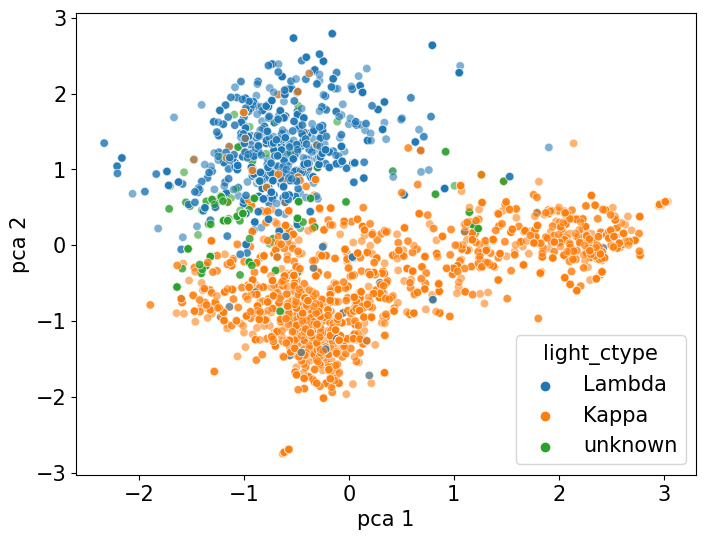

In [117]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="pca 1", y="pca 2", hue='light_ctype', data=metainf, alpha=0.58, palette='tab10')

### light_subclass

In [105]:
pd.crosstab(metainf['light_subclass'], metainf['ag'])

ag,0,1,2,3
light_subclass,,,,
IGKV1,1432,103,88,0
IGKV10,8,0,0,0
IGKV12,16,0,4,0
IGKV13,2,0,0,0
IGKV14,1,0,6,0
IGKV15,2,0,0,0
IGKV16,5,0,0,0
IGKV19,2,0,0,0
IGKV1D,6,0,0,0


In [91]:
pd.crosstab(metainf_exploded['light_subclass'], metainf_exploded['ag'])

ag,0,1,2,3
light_subclass,,,,
IGKV1,2738,239,150,0
IGKV10,9,0,0,0
IGKV12,19,0,7,0
IGKV13,6,0,0,0
IGKV14,1,0,10,0
IGKV15,2,0,0,0
IGKV16,5,0,0,0
IGKV19,2,0,0,0
IGKV1D,17,0,0,0


In [113]:
rare_light_subclass = metainf['light_subclass'].value_counts() [ metainf['light_subclass'].value_counts() < 100 ]
metainf['light_subclass2'] = metainf['light_subclass'].apply(lambda x: 'other' if x in rare_light_subclass else x)

In [114]:
pd.crosstab(metainf[metainf['light_ctype'] == 'Kappa'] ['light_subclass2'], 
            metainf[metainf['light_ctype'] == 'Kappa'] ['ag'])

ag,0,1,2
light_subclass2,,,
IGKV1,1432,103,88
IGKV2,154,7,24
IGKV3,373,705,35
IGKV4,22,155,4
other,108,12,30


In [111]:
rare_light_subclass = metainf_exploded['light_subclass'].value_counts() [ metainf_exploded['light_subclass'].value_counts() < 100 ]
metainf_exploded['light_subclass2'] = metainf_exploded['light_subclass'].apply(lambda x: 'other' if x in rare_light_subclass else x)

In [112]:
pd.crosstab(metainf_exploded[metainf_exploded['light_ctype'] == 'Kappa'] ['light_subclass2'], 
            metainf_exploded[metainf_exploded['light_ctype'] == 'Kappa'] ['ag'])

ag,0,1,2
light_subclass2,,,
IGKV1,2738,239,150
IGKV2,291,10,44
IGKV3,648,1353,62
IGKV4,33,309,10
other,159,22,44


<Axes: xlabel='pca 1', ylabel='pca 2'>

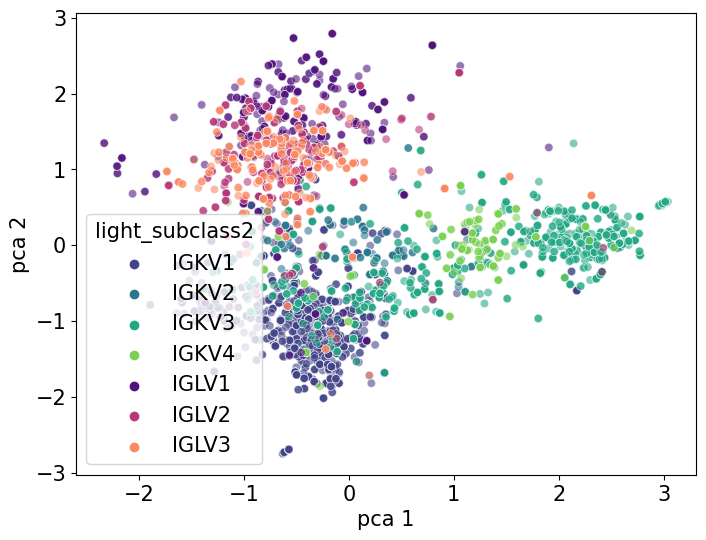

In [120]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="pca 1", y="pca 2", hue='light_subclass2', 
                data=metainf[ metainf['light_subclass2'].str.startswith('IGK') ].sort_values('light_subclass2'), 
                alpha=0.58, palette='viridis')
sns.scatterplot(x="pca 1", y="pca 2", hue='light_subclass2', 
                data=metainf[ metainf['light_subclass2'].str.startswith('IGL') ].sort_values('light_subclass2'), 
                alpha=0.58, palette='magma')


### heavy_subclass

In [121]:
pd.crosstab(metainf['heavy_subclass'], metainf['ag'])

ag,0,1,2,3
heavy_subclass,,,,
IGHV1,506,511,532,0
IGHV14,15,0,2,0
IGHV2,48,0,39,0
IGHV3,1174,283,575,0
IGHV4,217,65,252,0
IGHV5,81,60,61,0
IGHV6,12,13,9,0
IGHV7,12,4,12,0
IGHV8,3,0,6,0


In [124]:
rare_light_subclass = metainf['heavy_subclass'].value_counts() [ metainf['heavy_subclass'].value_counts() < 100 ]
metainf['heavy_subclass2'] = metainf['heavy_subclass'].apply(lambda x: 'other' if x in rare_light_subclass else x)

In [125]:
pd.crosstab(metainf['heavy_subclass2'], 
            metainf['ag'])

ag,0,1,2,3
heavy_subclass2,,,,
IGHV1,506,511,532,0
IGHV3,1174,283,575,0
IGHV4,217,65,252,0
IGHV5,81,60,61,0
other,93,17,80,0
unknown,76,122,244,76


In [126]:
pd.crosstab(metainf_exploded['heavy_subclass'], metainf_exploded['ag'])

ag,0,1,2,3
heavy_subclass,,,,
IGHV1,942,892,972,0
IGHV14,15,0,4,0
IGHV2,66,0,67,0
IGHV3,2141,646,1073,0
IGHV4,536,130,400,0
IGHV5,118,87,86,0
IGHV6,27,32,11,0
IGHV7,16,7,14,0
IGHV8,6,0,10,0


In [127]:
rare_light_subclass = metainf_exploded['heavy_subclass'].value_counts() [ metainf_exploded['heavy_subclass'].value_counts() < 100 ]
metainf_exploded['heavy_subclass2'] = metainf_exploded['heavy_subclass'].apply(lambda x: 'other' if x in rare_light_subclass else x)

In [128]:
pd.crosstab(metainf_exploded['heavy_subclass2'], 
            metainf_exploded['ag'])

ag,0,1,2,3
heavy_subclass2,,,,
IGHV1,942,892,972,0
IGHV2,66,0,67,0
IGHV3,2141,646,1073,0
IGHV4,536,130,400,0
IGHV5,118,87,86,0
other,67,39,69,0
unknown,96,266,353,395


<Axes: xlabel='pca 1', ylabel='pca 2'>

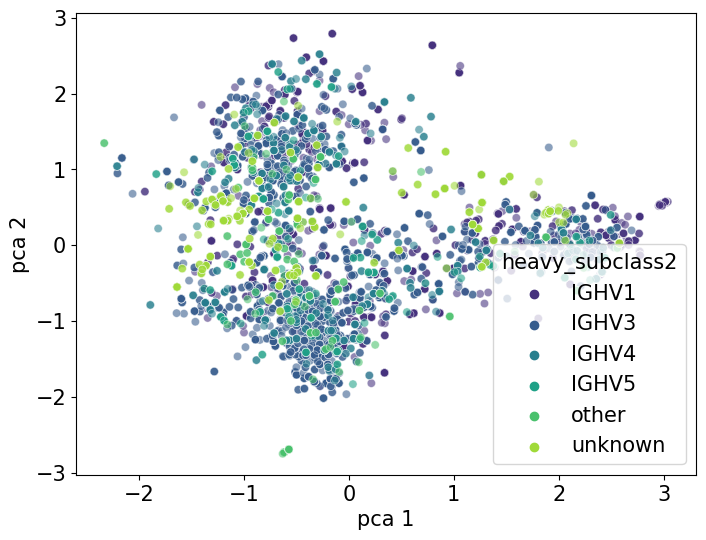

In [129]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="pca 1", y="pca 2", hue='heavy_subclass2', 
                data=metainf.sort_values('heavy_subclass2'), 
                alpha=0.58, palette='viridis')


### Третий кластер

In [130]:
print('\n'.join(metainf_exploded[metainf_exploded['ag']==3]['antigen_name'].unique()))

guanine nucleotide-binding protein g(i) subunit alpha-1
guanine nucleotide-binding protein g(i)/g(s)/g(t) subunitbeta-1 
guanine nucleotide-binding protein g(i)/g(s)/g(o) subunitgamma-2 
guanine nucleotide-binding protein g(q) subunit alpha
engineered g alpha 12 subunit
g protein subunit q (gi2-mini-gq chimera)
guanine nucleotide-binding protein g(q)
guanine nucleotide-binding protein g(i) subunit alpha-3
ggama
minigq
g-alpha subunit q (gi2-mini-gq chimeric)
g-alpha subunit q (gi2-mini-gq chimera)
a modified guanine nucleotide-binding protein g(q) subunitalpha 
engineered guanine nucleotide-binding protein g(q) subunitalpha 
guanine nucleotide-binding protein g(o) subunit alpha
g subunit q (gi2-mini-gq chimeric)
engineered g alpha 13 subunit
gq


In [133]:
clust3_ags = set(metainf_exploded[metainf_exploded['ag']==3]['antigen_name'].unique())

In [166]:
metainf_exploded[metainf_exploded['antigen_name'].isin(clust3_ags)]['ag'].value_counts()

3    395
Name: ag, dtype: int64

In [163]:
metainf_exploded = metainf_exploded.dropna(subset=['antigen_name'])

g_subunit = metainf_exploded[metainf_exploded['antigen_name'].str.contains('g') &
                              metainf_exploded['antigen_name'].str.contains('subunit') 
                              ]
g_subunit[g_subunit['ag'] != 3]['antigen_name'].unique()

array(['platelet-derived growth factor subunit b',
       'igg receptor fcrn large subunit p51',
       'pre-glycoprotein polyprotein gp complex,lassa virusglycoprotein, gp2 subunit ',
       'terminase, large subunit',
       'cytokine receptor common subunit gamma',
       'integrin alpha4 subunit', 'hemagglutinin ha2 subunit',
       'hemagglutinin ha1 subunit',
       'gamma-aminobutyric acid receptor subunit alpha-1',
       'gamma-aminobutyric acid receptor subunit gamma-2',
       'gamma-aminobutyric acid receptor subunit beta-2',
       'hemagglutinin, ha1 subunit'], dtype=object)

In [168]:
pd.crosstab(metainf_exploded['scfv'], metainf_exploded['ag'])

ag,0,1,2,3
scfv,,,,
False,3935,2036,2795,0
True,4,4,208,395


In [169]:
pd.crosstab(metainf_exploded['method'], metainf_exploded['ag'])

ag,0,1,2,3
method,,,,
ELECTRON MICROSCOPY,1408,864,1332,395
ELECTRON MICROSCOPY / HOMOLOGY MODEL,4,6,0,0
X-RAY DIFFRACTION,2527,1170,1671,0


<Axes: xlabel='date', ylabel='Density'>

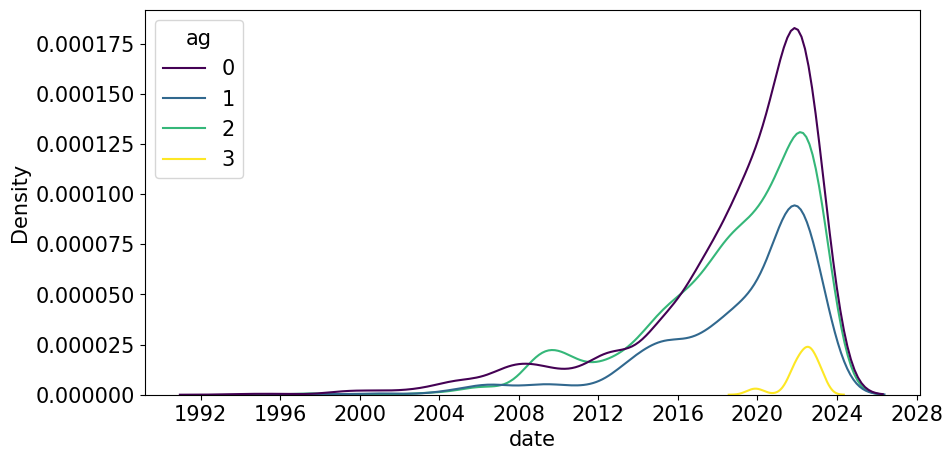

In [167]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=metainf, x='date', hue='ag', palette='viridis')